In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.__version__

'1.14.0'

In [2]:
import numpy as np
x_data = np.linspace(0.0,10.0,15)
x_data

array([ 0.        ,  0.71428571,  1.42857143,  2.14285714,  2.85714286,
        3.57142857,  4.28571429,  5.        ,  5.71428571,  6.42857143,
        7.14285714,  7.85714286,  8.57142857,  9.28571429, 10.        ])

In [3]:
noise = np.random.randn(len(x_data))
noise


array([-0.70999204,  0.64527573, -0.69366551, -1.60706319, -1.69676696,
       -2.46279943, -0.15782559, -0.56666897,  0.96228387,  0.70125008,
        0.05295228,  0.28418501, -2.46047362,  0.18335595,  0.05052504])

In [4]:
y_true = (0.5 * x_data) + 5 + noise
y_true

array([ 4.29000796,  6.00241859,  5.0206202 ,  4.46436538,  4.73180447,
        4.32291486,  6.98503156,  6.93333103,  8.81942673,  8.9155358 ,
        8.62438085,  9.21275644,  6.82524067,  9.82621309, 10.05052504])

In [5]:
x_df = pd.DataFrame(data = x_data, columns=['X_Data'])
x_df

,X_Data
0,0.000000
1,0.714286
2,1.428571
3,2.142857
4,2.857143
5,3.571429
6,4.285714
7,5.000000
8,5.714286
9,6.428571


In [6]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])
y_df

,Y
0,4.290008
1,6.002419
2,5.020620
3,4.464365
4,4.731804
5,4.322915
6,6.985032
7,6.933331
8,8.819427
9,8.915536


In [7]:
my_data = pd.concat([x_df,y_df],axis=1)

In [8]:
my_data


,X_Data,Y
0,0.000000,4.290008
1,0.714286,6.002419
2,1.428571,5.020620
3,2.142857,4.464365
4,2.857143,4.731804
5,3.571429,4.322915
6,4.285714,6.985032
7,5.000000,6.933331
8,5.714286,8.819427
9,6.428571,8.915536


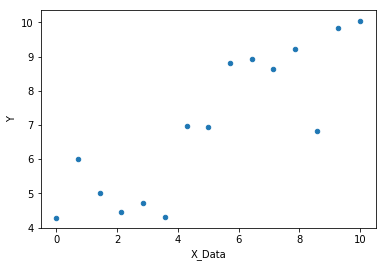

In [9]:
my_data.sample(n=15).plot(kind = 'scatter',x='X_Data', y = 'Y')


In [10]:
m = tf.Variable(0.5)
b = tf.Variable(1.0) 


In [11]:

xph = tf.placeholder(tf.float32,[8])
yph = tf.placeholder(tf.float32,[8])

In [12]:
y=m*xph+b

In [13]:
error = tf.reduce_sum(tf.square(yph-y))
error

<tf.Tensor 'Sum:0' shape=() dtype=float32>

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
train


<tf.Operation 'GradientDescent' type=NoOp>

In [15]:
i=tf.global_variables_initializer()

In [16]:
with tf.Session() as ss:
    ss.run(i)
    for i in range(1,10):
        ran = np.random.randint(len(x_data), size=8)
        feed = {xph:x_data[ran], yph:y_true[ran]}
        ss.run(train,feed_dict = feed)
    model_m, model_b = ss.run([m,b])

print(model_m)
print(model_b)
    

0.99962175
1.1791384


In [17]:
from sklearn.model_selection import train_test_split

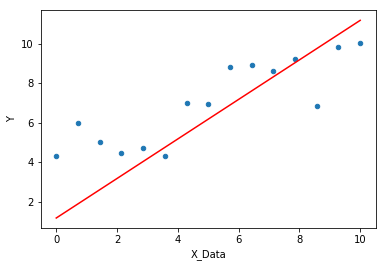

In [18]:
y_hat = x_data * model_m + model_b
my_data.sample(n=15).plot(kind = 'scatter',x='X_Data', y = 'Y')
plt.plot(x_data,y_hat,'r')


In [19]:
#Estimator API
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [20]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SUPERS~1\\AppData\\Local\\Temp\\tmpzpvnkvnz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C50EB44788>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_data, y_true, test_size=0.3, random_state=0)


In [22]:
x_train.shape
x_val.shape

(5,)

In [23]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None, shuffle=True)


In [24]:
input_train_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=10, shuffle=False)
x_val_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None, shuffle=True)


In [25]:
estimator.train(input_fn=input_func,steps=10)


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SUPERS~1\AppData\Local\Temp\tmpzpvnkvnz\model.ckpt.
INFO:tensorflow:loss = 103.283585, step = 1
INFO:tensorflow:Saving checkpoints for 10 into C:\Users\SUPERS~1\App

In [26]:
my_data

,X_Data,Y
0,0.000000,4.290008
1,0.714286,6.002419
2,1.428571,5.020620
3,2.142857,4.464365
4,2.857143,4.731804
5,3.571429,4.322915
6,4.285714,6.985032
7,5.000000,6.933331
8,5.714286,8.819427
9,6.428571,8.915536


In [27]:
input_train_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=10, shuffle=False)
x_val_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None, shuffle=True)

predict_input_func = tf.estimator.inputs.numpy_input_fn(x=x_val,batch_size=10,num_epochs=1,shuffle=False)
pred_gen=model.predict(predict_input_func)


NameError: name 'model' is not defined